In [231]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate
import math

In [232]:
edges_df = pd.read_csv("Edge.csv")
vertex_df = pd.read_csv("Vertex.csv")


In [233]:
edges_df

,User 1,User 2,Mutual Friend
0,JM,RD,14
1,RD,DK,13
2,DK,AM,19
3,PP1,RD,3
4,PP1,DD,15
5,DP,MS,27
6,DP,RD,5
7,DP,SKS,40
8,DP,AM,32
9,SKS,MS,19


In [234]:
vertex_df

,Vertex,Location,Number of Friends,Distinct Like count from Last 5 post
0,JS,"Ramchak, Moyna",1157,85
1,DD,"Durgapur, Burdwan",1034,220
2,MS,"Panchberia, Ghatal",874,189
3,JM,Contai,416,59
4,DK,Tamluk,428,8
5,PP1,Barpeta,961,48
6,DP,Khukurda,233,92
7,SKS,Khukurda,526,19
8,AM,Khukurda,946,219
9,PP2,Jhargram,1000,24


In [235]:
friend = pd.Series(vertex_df['Number of Friends'].values)

In [236]:
friend = pd.Series(vertex_df['Number of Friends'].values, index=vertex_df['Vertex']).to_dict()

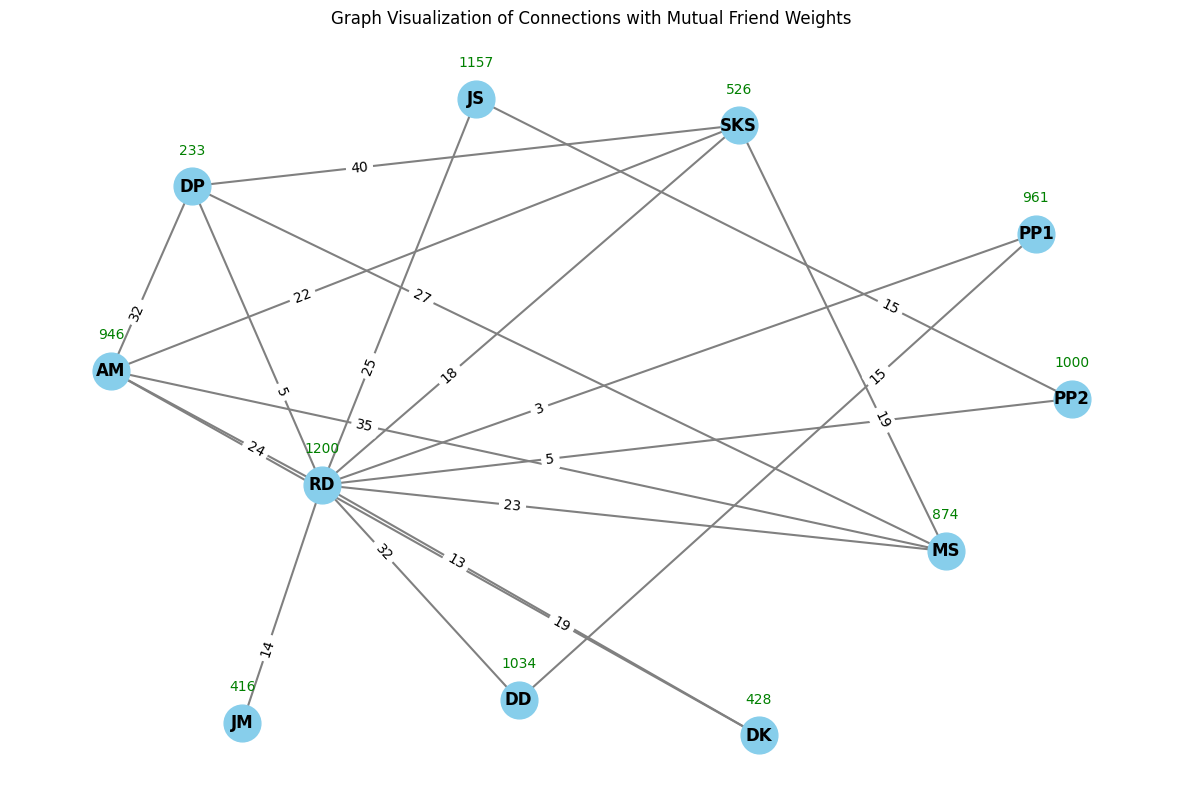

In [237]:
G= nx.from_pandas_edgelist(edges_df.head(150), source='User 1', target='User 2', edge_attr='Mutual Friend')
# Plot the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=3)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'Mutual Friend')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)

for node, (x, y) in pos.items():
    friend_count = friend.get(node, "N/A")  # Get friend count, default to "N/A" if not found
    plt.text(x, y + 0.1,  friend_count, ha='center', fontsize=10, color='green')

plt.title("Graph Visualization of Connections with Mutual Friend Weights")
plt.axis('off')  # Hide axes
plt.show()

# Tính các giá trị cho đỉnh

In [238]:
# Tạo dataframe ban đầu có 2 cột 
vertex_membership_value = vertex_df[['Vertex', 'Number of Friends']]


In [239]:
vertex_membership_value

,Vertex,Number of Friends
0,JS,1157
1,DD,1034
2,MS,874
3,JM,416
4,DK,428
5,PP1,961
6,DP,233
7,SKS,526
8,AM,946
9,PP2,1000


# Tính giá trị của các đỉnh

#### True Value = từng giá trị(Number of Friends) / max(Number of Friends) 

In [240]:
# Lấy giá trị lớn nhất của cột 'Number of Friends'
max_friends = vertex_membership_value['Number of Friends'].max()

# Tính cột 'True Value' bằng cách chia 'Number of Friends' cho max_friends, rồi làm tròn đến 2 chữ số thập phân
vertex_membership_value['True Value'] = (vertex_membership_value['Number of Friends'] / max_friends).round(2)

# Hiển thị DataFrame kết quả
vertex_membership_value


C:\Users\buiva\AppData\Local\Temp\ipykernel_6272\3706004480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertex_membership_value['True Value'] = (vertex_membership_value['Number of Friends'] / max_friends).round(2)


,Vertex,Number of Friends,True Value
0,JS,1157,0.96
1,DD,1034,0.86
2,MS,874,0.73
3,JM,416,0.35
4,DK,428,0.36
5,PP1,961,0.80
6,DP,233,0.19
7,SKS,526,0.44
8,AM,946,0.79
9,PP2,1000,0.83


#### Number of inactive friends =  Number of Friends - Number of active friends

In [241]:
vertex_membership_value['Number of inactive friends'] = (vertex_membership_value['Number of Friends'] - vertex_df['Distinct Like count from Last 5 post'])


In [242]:
vertex_membership_value

,Vertex,Number of Friends,True Value,Number of inactive friends
0,JS,1157,0.96,1072
1,DD,1034,0.86,814
2,MS,874,0.73,685
3,JM,416,0.35,357
4,DK,428,0.36,420
5,PP1,961,0.80,913
6,DP,233,0.19,141
7,SKS,526,0.44,507
8,AM,946,0.79,727
9,PP2,1000,0.83,976


#### Thêm cột Number of active friends

In [243]:
vertex_membership_value['Number of active friends'] = vertex_df['Distinct Like count from Last 5 post']

In [244]:
vertex_membership_value

,Vertex,Number of Friends,True Value,Number of inactive friends,Number of active friends
0,JS,1157,0.96,1072,85
1,DD,1034,0.86,814,220
2,MS,874,0.73,685,189
3,JM,416,0.35,357,59
4,DK,428,0.36,420,8
5,PP1,961,0.80,913,48
6,DP,233,0.19,141,92
7,SKS,526,0.44,507,19
8,AM,946,0.79,727,219
9,PP2,1000,0.83,976,24


#### Tính Indeterminacey = 1 - (Numbers of active friends / Number of friend)^2

In [245]:
vertex_membership_value['Indeterminacy'] = 1 - ((vertex_membership_value['Number of active friends'] / vertex_membership_value['Number of Friends']) ** 2)

# Làm tròn 2 chữ số thập phân
vertex_membership_value['Indeterminacy'] = vertex_membership_value['Indeterminacy'].round(2)

vertex_membership_value


,Vertex,Number of Friends,True Value,Number of inactive friends,Number of active friends,Indeterminacy
0,JS,1157,0.96,1072,85,0.99
1,DD,1034,0.86,814,220,0.95
2,MS,874,0.73,685,189,0.95
3,JM,416,0.35,357,59,0.98
4,DK,428,0.36,420,8,1.00
5,PP1,961,0.80,913,48,1.00
6,DP,233,0.19,141,92,0.84
7,SKS,526,0.44,507,19,1.00
8,AM,946,0.79,727,219,0.95
9,PP2,1000,0.83,976,24,1.00


#### Tính Falsity = Number of inactive friends / Number of friend

In [246]:
# Làm tròn 2 chữ số thập phân
vertex_membership_value['Falsity'] = (vertex_membership_value['Number of inactive friends'] / vertex_membership_value['Number of Friends']).round(2)
vertex_membership_value


,Vertex,Number of Friends,True Value,Number of inactive friends,Number of active friends,Indeterminacy,Falsity
0,JS,1157,0.96,1072,85,0.99,0.93
1,DD,1034,0.86,814,220,0.95,0.79
2,MS,874,0.73,685,189,0.95,0.78
3,JM,416,0.35,357,59,0.98,0.86
4,DK,428,0.36,420,8,1.00,0.98
5,PP1,961,0.80,913,48,1.00,0.95
6,DP,233,0.19,141,92,0.84,0.61
7,SKS,526,0.44,507,19,1.00,0.96
8,AM,946,0.79,727,219,0.95,0.77
9,PP2,1000,0.83,976,24,1.00,0.98


#### Biểu diễn mô hình

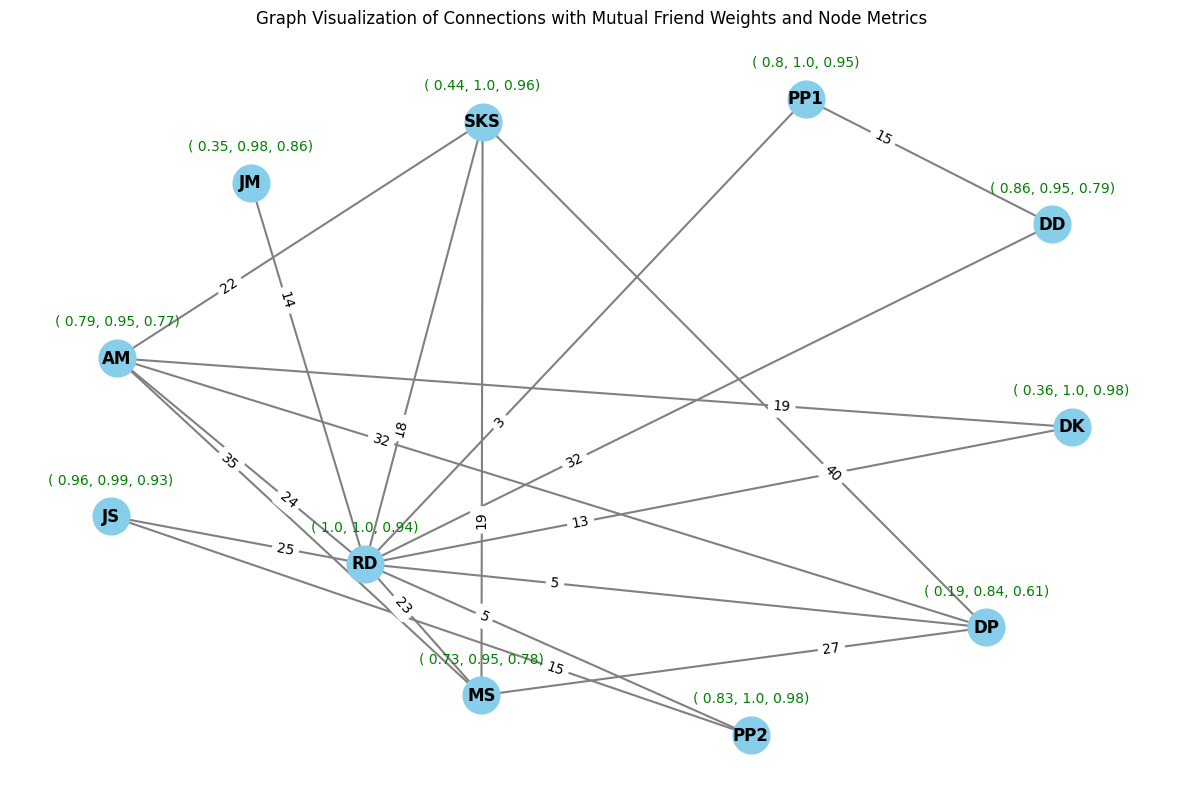

In [247]:
import networkx as nx
import matplotlib.pyplot as plt

# Giả sử vertex_membership_value là DataFrame chứa các đỉnh và ba chỉ số
# Tạo từ điển chứa ba giá trị (True, Falsity, Indeterminacy) cho mỗi đỉnh
metrics = {
    row['Vertex']: (row['True Value'], row['Falsity'], row['Indeterminacy'])
    for _, row in vertex_membership_value.iterrows()
}

# Tạo đồ thị từ danh sách cạnh
G = nx.from_pandas_edgelist(edges_df.head(150), source='User 1', target='User 2', edge_attr='Mutual Friend')

# Vẽ đồ thị
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=3)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Hiển thị trọng số cạnh (số bạn chung)
edge_labels = nx.get_edge_attributes(G, 'Mutual Friend')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)

# Hiển thị 3 chỉ số trên mỗi đỉnh
for node, (x, y) in pos.items():
    # Lấy ba chỉ số từ từ điển
    true_val, falsity_val, indeterminacy_val = metrics.get(node, ("N/A", "N/A", "N/A"))
    label_text = f"( {true_val}, {indeterminacy_val}, {falsity_val})"
    plt.text(x, y + 0.1, label_text, ha='center', fontsize=10, color='green')

plt.title("Graph Visualization of Connections with Mutual Friend Weights and Node Metrics")
plt.axis('off')  # Hide axes
plt.show()


# Tính giá trị các cạnh

In [248]:
edges_df['Edges'] = edges_df['User 1'] + '-' + edges_df['User 2']


In [249]:
edge_membership_value = edges_df[['Edges', 'Mutual Friend']]

In [250]:
edge_membership_value

,Edges,Mutual Friend
0,JM-RD,14
1,RD-DK,13
2,DK-AM,19
3,PP1-RD,3
4,PP1-DD,15
5,DP-MS,27
6,DP-RD,5
7,DP-SKS,40
8,DP-AM,32
9,SKS-MS,19


#### Tính Normalized = Giá trị cột Mutual friends / max(Mutual Friend)

In [251]:
max_Mutual_friends = edge_membership_value['Mutual Friend'].max()
edge_membership_value['Normalized'] = (edge_membership_value['Mutual Friend'] /  max_Mutual_friends).round(2)

C:\Users\buiva\AppData\Local\Temp\ipykernel_6272\1030448108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edge_membership_value['Normalized'] = (edge_membership_value['Mutual Friend'] /  max_Mutual_friends).round(2)


In [252]:
edge_membership_value

,Edges,Mutual Friend,Normalized
0,JM-RD,14,0.35
1,RD-DK,13,0.32
2,DK-AM,19,0.48
3,PP1-RD,3,0.08
4,PP1-DD,15,0.38
5,DP-MS,27,0.68
6,DP-RD,5,0.12
7,DP-SKS,40,1.00
8,DP-AM,32,0.80
9,SKS-MS,19,0.48


#### Tính True value = normalized * Min(True value của 2 đỉnh)

In [253]:
# Lấy true value của các đỉnh 
true_value_dict = vertex_membership_value.set_index('Vertex')['True Value'].to_dict()
# Hàm tính True Value cho các cạnh 
def calculate_true_value(row):
    user1, user2 = row['Edges'].split('-')
    normalized = row['Normalized']
    
    # Lấy True Value cho mỗi đỉnh từ từ điển
    true_value_user1 = true_value_dict.get(user1, 0)
    true_value_user2 = true_value_dict.get(user2, 0)
    
    # Tính giá trị True Membership cho cạnh
    return normalized * min(true_value_user1, true_value_user2)

In [254]:
edge_membership_value['True Value'] = edge_membership_value.apply(calculate_true_value, axis=1)
# Làm tròn 2 chữ số
edge_membership_value['True Value'] = edge_membership_value['True Value'].round(2)

In [255]:
edge_membership_value

,Edges,Mutual Friend,Normalized,True Value
0,JM-RD,14,0.35,0.12
1,RD-DK,13,0.32,0.12
2,DK-AM,19,0.48,0.17
3,PP1-RD,3,0.08,0.06
4,PP1-DD,15,0.38,0.30
5,DP-MS,27,0.68,0.13
6,DP-RD,5,0.12,0.02
7,DP-SKS,40,1.00,0.19
8,DP-AM,32,0.80,0.15
9,SKS-MS,19,0.48,0.21


#### Tính Indetermensity value = MAX(indeterminacy của 2 đỉnh)

In [256]:
# Lấy indeterminacy value của các đỉnh 
indeterminacy_dict = vertex_membership_value.set_index('Vertex')['Indeterminacy']
# Hàm tính True Value cho các cạnh 
def calculate_indeterminacy_value(row):
    user1, user2 = row['Edges'].split('-')
    
    # Lấy indeterminacy cho mỗi đỉnh từ từ điển
    indeterminacy_value_user1 = indeterminacy_dict.get(user1, 0)
    indeterminacy_value_user2 = indeterminacy_dict.get(user2, 0)
    
    # Tính giá trị Indetermensity cho cạnh
    return  max(indeterminacy_value_user1, indeterminacy_value_user2)

In [257]:
indeterminacy_dict

Vertex
JS     0.99
DD     0.95
MS     0.95
JM     0.98
DK     1.00
PP1    1.00
DP     0.84
SKS    1.00
AM     0.95
PP2    1.00
RD     1.00
Name: Indeterminacy, dtype: float64

In [258]:
edge_membership_value['Indetermensity'] = edge_membership_value.apply(calculate_indeterminacy_value, axis=1)

In [259]:
edge_membership_value

,Edges,Mutual Friend,Normalized,True Value,Indetermensity
0,JM-RD,14,0.35,0.12,1.00
1,RD-DK,13,0.32,0.12,1.00
2,DK-AM,19,0.48,0.17,1.00
3,PP1-RD,3,0.08,0.06,1.00
4,PP1-DD,15,0.38,0.30,1.00
5,DP-MS,27,0.68,0.13,0.95
6,DP-RD,5,0.12,0.02,1.00
7,DP-SKS,40,1.00,0.19,1.00
8,DP-AM,32,0.80,0.15,0.95
9,SKS-MS,19,0.48,0.21,1.00


#### Tính Falsity value = MAX(Falsity của 2 đỉnh)

In [260]:
# Lấy falsity value của các đỉnh 
falsity_value_dict = vertex_membership_value.set_index('Vertex')['Falsity']
# Hàm tính Falsity cho các cạnh 
def calculate_falsity_value(row):
    user1, user2 = row['Edges'].split('-')
    
    # Lấy Falsity cho mỗi đỉnh từ từ điển
    falsity_value_user1 = falsity_value_dict.get(user1, 0)
    falsity_value_user2 = falsity_value_dict.get(user2, 0)
    
    # Tính giá trị Indetermensity cho cạnh
    return  max(falsity_value_user1, falsity_value_user2)

In [261]:
edge_membership_value['Falsity value'] = edge_membership_value.apply(calculate_falsity_value, axis=1)

In [262]:
edge_membership_value

,Edges,Mutual Friend,Normalized,True Value,Indetermensity,Falsity value
0,JM-RD,14,0.35,0.12,1.00,0.94
1,RD-DK,13,0.32,0.12,1.00,0.98
2,DK-AM,19,0.48,0.17,1.00,0.98
3,PP1-RD,3,0.08,0.06,1.00,0.95
4,PP1-DD,15,0.38,0.30,1.00,0.95
5,DP-MS,27,0.68,0.13,0.95,0.78
6,DP-RD,5,0.12,0.02,1.00,0.94
7,DP-SKS,40,1.00,0.19,1.00,0.96
8,DP-AM,32,0.80,0.15,0.95,0.77
9,SKS-MS,19,0.48,0.21,1.00,0.96


In [263]:
edge_membership_value[['User 1', 'User 2']] = edge_membership_value['Edges'].str.split('-', expand=True)

In [264]:
edge_membership_value

,Edges,Mutual Friend,Normalized,True Value,Indetermensity,Falsity value,User 1,User 2
0,JM-RD,14,0.35,0.12,1.00,0.94,JM,RD
1,RD-DK,13,0.32,0.12,1.00,0.98,RD,DK
2,DK-AM,19,0.48,0.17,1.00,0.98,DK,AM
3,PP1-RD,3,0.08,0.06,1.00,0.95,PP1,RD
4,PP1-DD,15,0.38,0.30,1.00,0.95,PP1,DD
5,DP-MS,27,0.68,0.13,0.95,0.78,DP,MS
6,DP-RD,5,0.12,0.02,1.00,0.94,DP,RD
7,DP-SKS,40,1.00,0.19,1.00,0.96,DP,SKS
8,DP-AM,32,0.80,0.15,0.95,0.77,DP,AM
9,SKS-MS,19,0.48,0.21,1.00,0.96,SKS,MS


#### Trực quan hóa dữ liệu

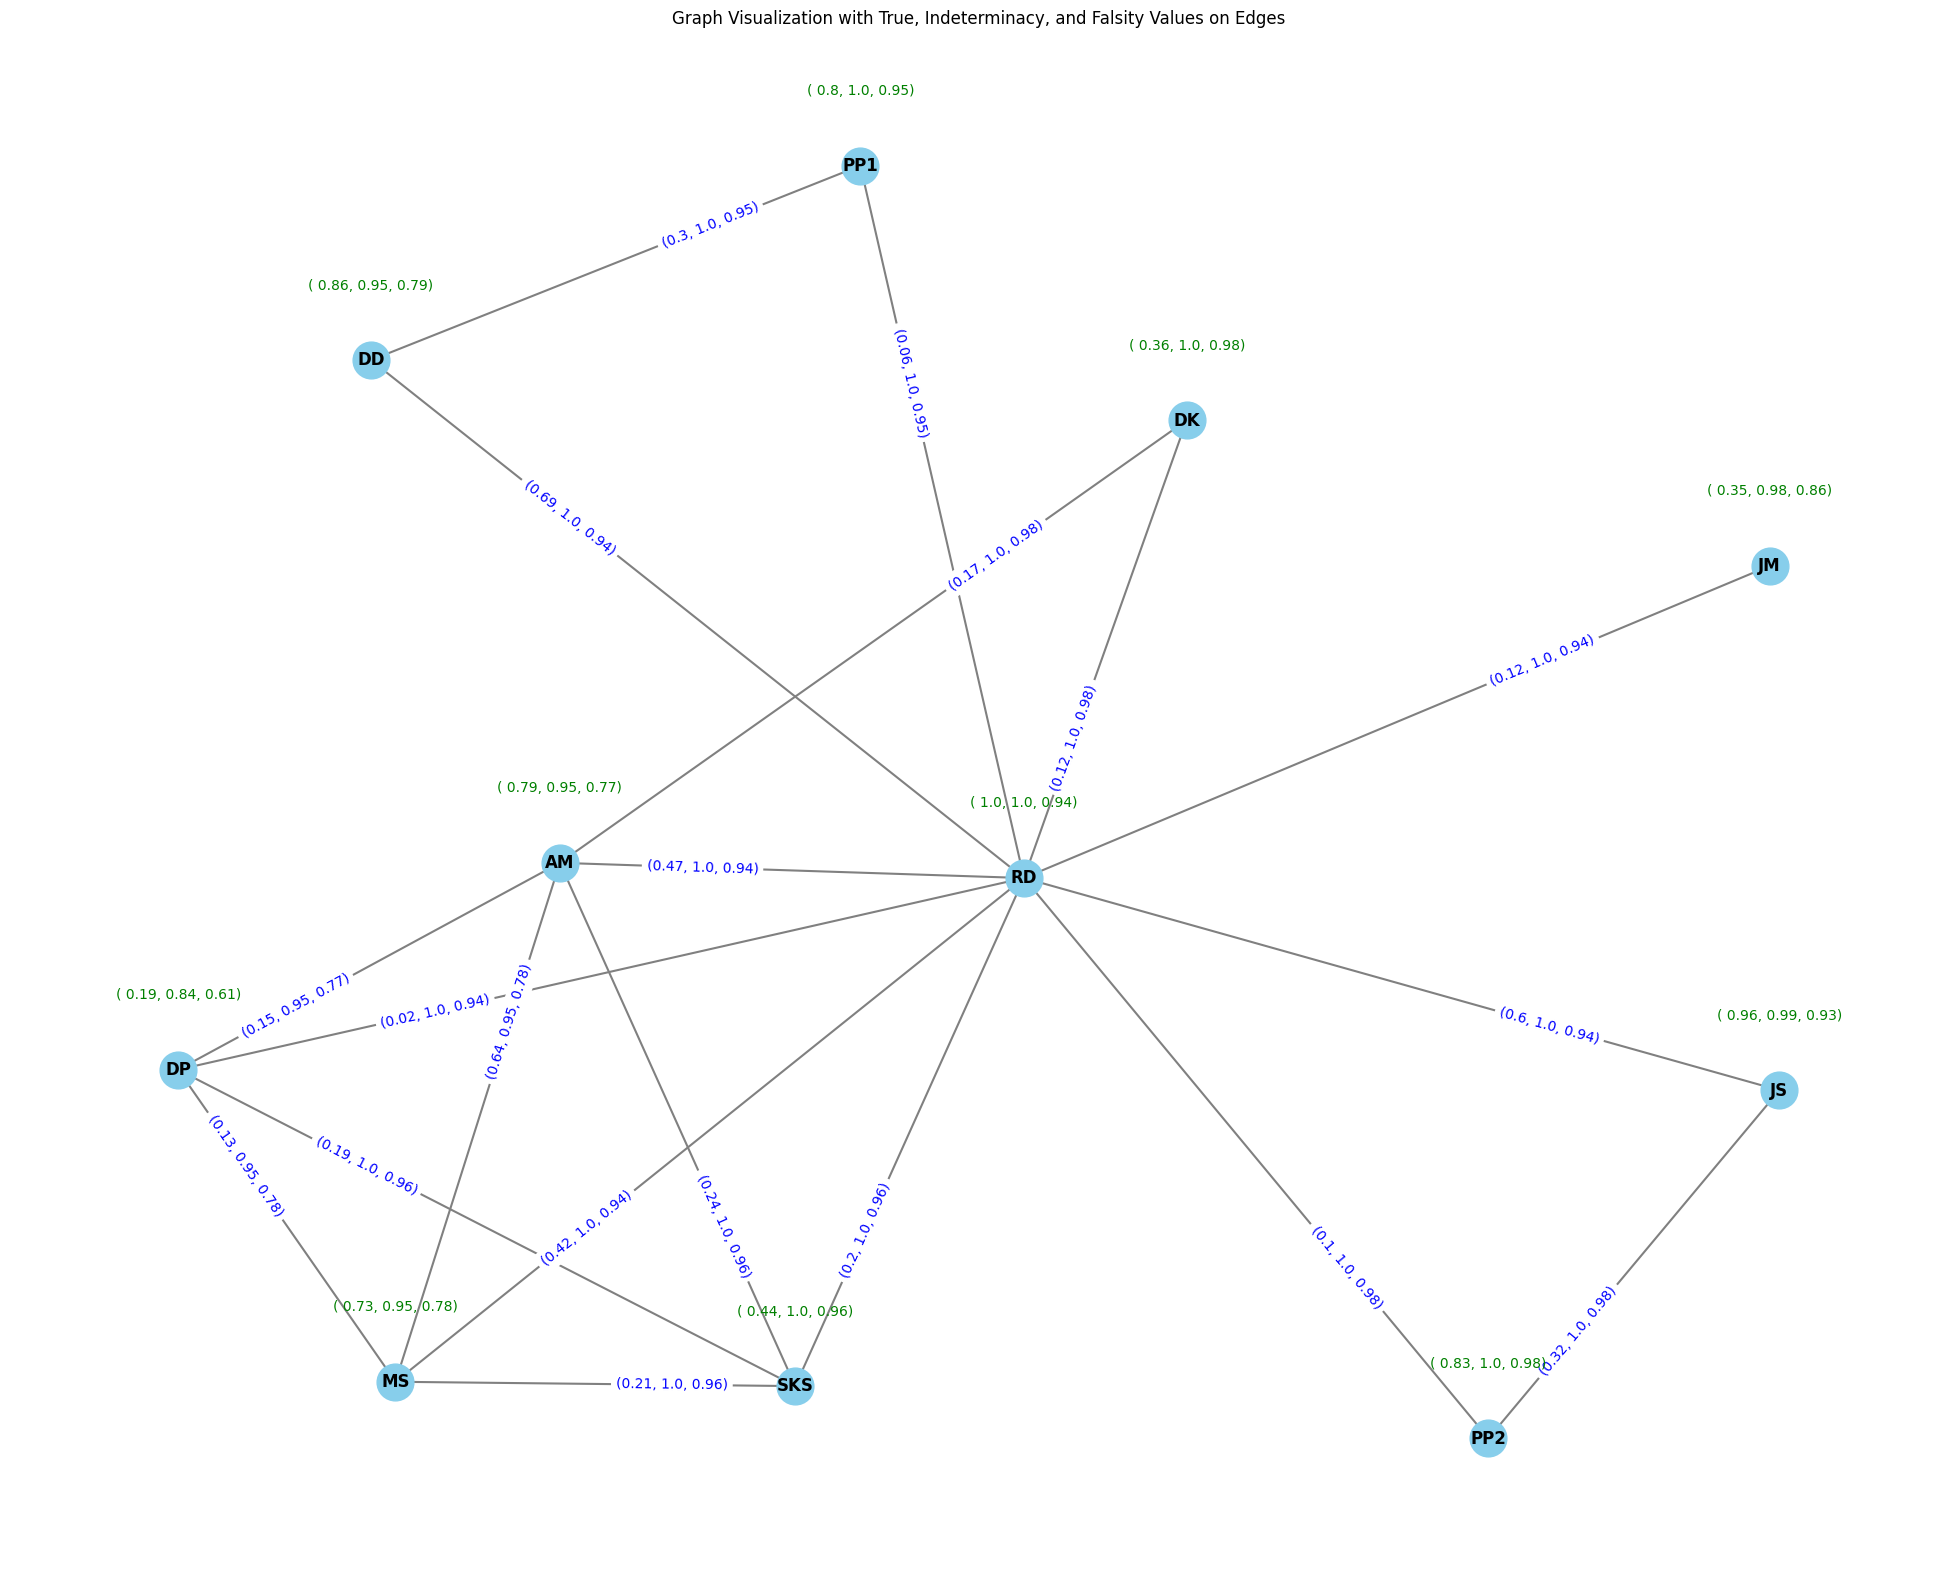

In [265]:


# Tạo đồ thị từ danh sách cạnh
G = nx.from_pandas_edgelist(edges_df.head(150), source='User 1', target='User 2')

# Vẽ đồ thị
plt.figure(figsize=(25, 20))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Hiển thị 3 chỉ số (True, Indeterminacy, Falsity) trên mỗi cạnh
edge_labels = {}
for _, row in edge_membership_value.iterrows():
    user1 = row['User 1']
    user2 = row['User 2']
    true_val = row['True Value']
    indeterminacy_val = row['Indetermensity']
    falsity_val = row['Falsity value']
    
    # Tạo nhãn cho cạnh
    edge_label = f"({true_val}, {indeterminacy_val}, {falsity_val})"
    edge_labels[(user1, user2)] = edge_label

# Vẽ nhãn cho các cạnh
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_color='blue')

# Hiển thị 3 chỉ số trên mỗi đỉnh
for node, (x, y) in pos.items():
    true_val, falsity_val, indeterminacy_val = metrics.get(node, ("N/A", "N/A", "N/A"))
    label_text = f"( {true_val}, {indeterminacy_val}, {falsity_val})"
    plt.text(x, y + 0.1, label_text, ha='center', fontsize=10, color='green')

plt.title("Graph Visualization with True, Indeterminacy, and Falsity Values on Edges")
plt.axis('off')  # Hide axes
plt.show()


# Tính cho thuộc tính Location 

In [266]:
location_df = pd.read_csv("Predict_edge.csv")

In [267]:
location_df

,Predicted edge,Home Adress Distance in KM,Distance Between Facebook Adress in KM
0,JM-DK,63.0,56.00
1,JM-MS,109.0,119.00
2,JM-DD,53.0,50.00
3,JM-JS,55.0,70.50
4,JM-PP2,102.3,100.10
5,JM-AM,19.0,23.00
6,JM-SKS,22.5,21.00
7,JM-DP,56.0,60.00
8,JM-PP1,103.0,117.30
9,DK-PP1,96.0,60.00


#### Home adress distance unit = home adress distan / 20 

In [268]:
location_membership_value = location_df

In [269]:
location_membership_value['Home Adress Distacne Unit'] = (location_membership_value['Home Adress Distance in KM'] / 20).round(2)

In [270]:
location_membership_value

,Predicted edge,Home Adress Distance in KM,Distance Between Facebook Adress in KM,Home Adress Distacne Unit
0,JM-DK,63.0,56.00,3.15
1,JM-MS,109.0,119.00,5.45
2,JM-DD,53.0,50.00,2.65
3,JM-JS,55.0,70.50,2.75
4,JM-PP2,102.3,100.10,5.12
5,JM-AM,19.0,23.00,0.95
6,JM-SKS,22.5,21.00,1.12
7,JM-DP,56.0,60.00,2.80
8,JM-PP1,103.0,117.30,5.15
9,DK-PP1,96.0,60.00,4.80


#### Tính True Nembership value = 1 / Home Adress Distacne Unit

In [271]:
location_membership_value['True nembership location value'] = (1 /location_membership_value['Home Adress Distacne Unit']).round(2)

In [272]:
location_membership_value

,Predicted edge,Home Adress Distance in KM,Distance Between Facebook Adress in KM,Home Adress Distacne Unit,True nembership location value
0,JM-DK,63.0,56.00,3.15,0.32
1,JM-MS,109.0,119.00,5.45,0.18
2,JM-DD,53.0,50.00,2.65,0.38
3,JM-JS,55.0,70.50,2.75,0.36
4,JM-PP2,102.3,100.10,5.12,0.20
5,JM-AM,19.0,23.00,0.95,1.05
6,JM-SKS,22.5,21.00,1.12,0.89
7,JM-DP,56.0,60.00,2.80,0.36
8,JM-PP1,103.0,117.30,5.15,0.19
9,DK-PP1,96.0,60.00,4.80,0.21


#### Tính Error = |Home adress distance - Distance between facebook adress|

In [273]:
location_membership_value['Error'] = abs(location_membership_value['Distance Between Facebook Adress in KM'] - location_membership_value['Home Adress Distance in KM'])

In [274]:
location_membership_value

,Predicted edge,Home Adress Distance in KM,Distance Between Facebook Adress in KM,Home Adress Distacne Unit,True nembership location value,Error
0,JM-DK,63.0,56.00,3.15,0.32,7.00
1,JM-MS,109.0,119.00,5.45,0.18,10.00
2,JM-DD,53.0,50.00,2.65,0.38,3.00
3,JM-JS,55.0,70.50,2.75,0.36,15.50
4,JM-PP2,102.3,100.10,5.12,0.20,2.20
5,JM-AM,19.0,23.00,0.95,1.05,4.00
6,JM-SKS,22.5,21.00,1.12,0.89,1.50
7,JM-DP,56.0,60.00,2.80,0.36,4.00
8,JM-PP1,103.0,117.30,5.15,0.19,14.30
9,DK-PP1,96.0,60.00,4.80,0.21,36.00


#### Tính Indetermincy = Error / MAX(Error)

In [275]:
max_error = max(location_membership_value['Error'])
location_membership_value['Indetermincy membership location value'] = (location_membership_value['Error'] / max_error).round(2)

In [276]:
location_membership_value

,Predicted edge,Home Adress Distance in KM,Distance Between Facebook Adress in KM,Home Adress Distacne Unit,True nembership location value,Error,Indetermincy membership location value
0,JM-DK,63.0,56.00,3.15,0.32,7.00,0.07
1,JM-MS,109.0,119.00,5.45,0.18,10.00,0.10
2,JM-DD,53.0,50.00,2.65,0.38,3.00,0.03
3,JM-JS,55.0,70.50,2.75,0.36,15.50,0.15
4,JM-PP2,102.3,100.10,5.12,0.20,2.20,0.02
5,JM-AM,19.0,23.00,0.95,1.05,4.00,0.04
6,JM-SKS,22.5,21.00,1.12,0.89,1.50,0.01
7,JM-DP,56.0,60.00,2.80,0.36,4.00,0.04
8,JM-PP1,103.0,117.30,5.15,0.19,14.30,0.14
9,DK-PP1,96.0,60.00,4.80,0.21,36.00,0.36


#### Tính Falsity nembership value = Error / Home adress distance 

In [277]:
location_membership_value['Falsity nembership location value'] = (location_membership_value['Error'] / location_membership_value['Home Adress Distance in KM']).round(2)

In [278]:
# Tạo danh sách các cạnh để đưa vào hàm tìm kiếm các đỉnh chung
location_membership_value[['User 1 Predict', 'User 2 Predict']] = location_membership_value['Predicted edge'].str.split('-', expand=True)

In [279]:
location_membership_value

,Predicted edge,Home Adress Distance in KM,Distance Between Facebook Adress in KM,Home Adress Distacne Unit,True nembership location value,Error,Indetermincy membership location value,Falsity nembership location value,User 1 Predict,User 2 Predict
0,JM-DK,63.0,56.00,3.15,0.32,7.00,0.07,0.11,JM,DK
1,JM-MS,109.0,119.00,5.45,0.18,10.00,0.10,0.09,JM,MS
2,JM-DD,53.0,50.00,2.65,0.38,3.00,0.03,0.06,JM,DD
3,JM-JS,55.0,70.50,2.75,0.36,15.50,0.15,0.28,JM,JS
4,JM-PP2,102.3,100.10,5.12,0.20,2.20,0.02,0.02,JM,PP2
5,JM-AM,19.0,23.00,0.95,1.05,4.00,0.04,0.21,JM,AM
6,JM-SKS,22.5,21.00,1.12,0.89,1.50,0.01,0.07,JM,SKS
7,JM-DP,56.0,60.00,2.80,0.36,4.00,0.04,0.07,JM,DP
8,JM-PP1,103.0,117.30,5.15,0.19,14.30,0.14,0.14,JM,PP1
9,DK-PP1,96.0,60.00,4.80,0.21,36.00,0.36,0.38,DK,PP1


In [280]:
location_membership_value_results = location_membership_value[['User 1 Predict','User 2 Predict','True nembership location value','Indetermincy membership location value','Falsity nembership location value']]

In [281]:
location_membership_value_results

,User 1 Predict,User 2 Predict,True nembership location value,Indetermincy membership location value,Falsity nembership location value
0,JM,DK,0.32,0.07,0.11
1,JM,MS,0.18,0.10,0.09
2,JM,DD,0.38,0.03,0.06
3,JM,JS,0.36,0.15,0.28
4,JM,PP2,0.20,0.02,0.02
5,JM,AM,1.05,0.04,0.21
6,JM,SKS,0.89,0.01,0.07
7,JM,DP,0.36,0.04,0.07
8,JM,PP1,0.19,0.14,0.14
9,DK,PP1,0.21,0.36,0.38


# Tìm danh sách các đỉnh hàng xóm của các cạnh cần dự đoán 

In [282]:
G_edge = nx.from_pandas_edgelist(edges_df, source= 'User 1', target= 'User 2')

In [283]:
# hàm tìm kiếm đỉnh chung của cạnh
def find_common_neighbors(graph, u, v):
    return list(nx.common_neighbors(graph, u, v))

In [284]:
edge_list = pd.read_csv('Predict_edge.csv')

In [285]:
# Tạo danh sách các cạnh để đưa vào hàm tìm kiếm các đỉnh chung
edge_list[['User 1 Predict', 'User 2 Predict']] = edge_list['Predicted edge'].str.split('-', expand=True)

In [286]:
edges_list_find_node = list(zip(edge_list['User 1 Predict'], edge_list['User 2 Predict']))

In [287]:
edges_list_find_node

[('JM', 'DK'),
 ('JM', 'MS'),
 ('JM', 'DD'),
 ('JM', 'JS'),
 ('JM', 'PP2'),
 ('JM', 'AM'),
 ('JM', 'SKS'),
 ('JM', 'DP'),
 ('JM', 'PP1'),
 ('DK', 'PP1'),
 ('DK', 'DP'),
 ('DK', 'SKS'),
 ('DK', 'PP2'),
 ('DK', 'JS'),
 ('DK', 'DD'),
 ('DK', 'MS'),
 ('DP', 'PP1'),
 ('SKS', 'PP1'),
 ('AM', 'PP1'),
 ('PP2', 'PP1'),
 ('JS', 'PP1'),
 ('MS', 'PP1'),
 ('DP', 'PP2'),
 ('DP', 'JS'),
 ('DP', 'DD'),
 ('SKS', 'PP2'),
 ('SKS', 'JS'),
 ('SKS', 'DD'),
 ('AM', 'PP2'),
 ('AM', 'JS'),
 ('AM', 'DD'),
 ('PP2', 'DD'),
 ('PP2', 'MS'),
 ('JS', 'DD'),
 ('JS', 'MS'),
 ('DD', 'MS')]

In [288]:
results = []
for u, v in edges_list_find_node:
    common_neighbors = find_common_neighbors(G_edge, u, v)
    results.append((u, v, common_neighbors))

In [289]:
common_neighbors_df = pd.DataFrame(results, columns=['User 1 Predict', 'User 2 Predict', 'Common Neighbors'])

In [290]:
common_neighbors_df

,User 1 Predict,User 2 Predict,Common Neighbors
0,JM,DK,[RD]
1,JM,MS,[RD]
2,JM,DD,[RD]
3,JM,JS,[RD]
4,JM,PP2,[RD]
5,JM,AM,[RD]
6,JM,SKS,[RD]
7,JM,DP,[RD]
8,JM,PP1,[RD]
9,DK,PP1,[RD]


In [291]:
edges_combined = []
for index, row in common_neighbors_df.iterrows():
    user1 = row['User 1 Predict']
    user2 = row['User 2 Predict']
    common_neighbors = row['Common Neighbors']
    
    # Tạo danh sách các cạnh kết hợp từ User 1 và User 2 với các đỉnh chung
    combined_edges = [(user1, neighbor) for neighbor in common_neighbors] + [(user2, neighbor) for neighbor in common_neighbors]
    edges_combined.append(combined_edges)

# Thêm cột 'Combined Edges' vào DataFrame
common_neighbors_df['Combined Edges'] = edges_combined

In [292]:
common_neighbors_df

,User 1 Predict,User 2 Predict,Common Neighbors,Combined Edges
0,JM,DK,[RD],"[(JM, RD), (DK, RD)]"
1,JM,MS,[RD],"[(JM, RD), (MS, RD)]"
2,JM,DD,[RD],"[(JM, RD), (DD, RD)]"
3,JM,JS,[RD],"[(JM, RD), (JS, RD)]"
4,JM,PP2,[RD],"[(JM, RD), (PP2, RD)]"
5,JM,AM,[RD],"[(JM, RD), (AM, RD)]"
6,JM,SKS,[RD],"[(JM, RD), (SKS, RD)]"
7,JM,DP,[RD],"[(JM, RD), (DP, RD)]"
8,JM,PP1,[RD],"[(JM, RD), (PP1, RD)]"
9,DK,PP1,[RD],"[(DK, RD), (PP1, RD)]"


In [293]:
# Tạo từ điển ánh xạ từ bảng `edge_membership_value`
mapping = {}
for _, row in edge_membership_value.iterrows():
    edge_key = (row['User 1'], row['User 2'])
    mapping[edge_key] = (row['True Value'], row['Indetermensity'], row['Falsity value'])

In [294]:
true_values_list = []
indeterminacy_values_list = []
falsity_values_list = []
for combined_edges in common_neighbors_df['Combined Edges']:
    true_values = []
    indeterminacy_values = []
    falsity_values = []

    for edge in combined_edges:
        edge_key = edge
        # Ánh xạ trực tiếp từ từ điển
        if edge_key in mapping or edge_key[::-1] in mapping:
            values = mapping.get(edge_key, mapping.get(edge_key[::-1], (None, None, None)))
            true_values.append(values[0])
            indeterminacy_values.append(values[1])
            falsity_values.append(values[2])
        else:
            true_values.append(None)
            indeterminacy_values.append(None)
            falsity_values.append(None)

    # Lưu kết quả vào danh sách
    true_values_list.append(true_values)
    indeterminacy_values_list.append(indeterminacy_values)
    falsity_values_list.append(falsity_values)

# Thêm các cột kết quả vào `common_neighbors_df`
common_neighbors_df['True Values'] = true_values_list
common_neighbors_df['Indeterminacy Values'] = indeterminacy_values_list
common_neighbors_df['Falsity Values'] = falsity_values_list

In [295]:
common_neighbors_df

,User 1 Predict,User 2 Predict,Common Neighbors,Combined Edges,True Values,Indeterminacy Values,Falsity Values
0,JM,DK,[RD],"[(JM, RD), (DK, RD)]","[0.12, 0.12]","[1.0, 1.0]","[0.94, 0.98]"
1,JM,MS,[RD],"[(JM, RD), (MS, RD)]","[0.12, 0.42]","[1.0, 1.0]","[0.94, 0.94]"
2,JM,DD,[RD],"[(JM, RD), (DD, RD)]","[0.12, 0.69]","[1.0, 1.0]","[0.94, 0.94]"
3,JM,JS,[RD],"[(JM, RD), (JS, RD)]","[0.12, 0.6]","[1.0, 1.0]","[0.94, 0.94]"
4,JM,PP2,[RD],"[(JM, RD), (PP2, RD)]","[0.12, 0.1]","[1.0, 1.0]","[0.94, 0.98]"
5,JM,AM,[RD],"[(JM, RD), (AM, RD)]","[0.12, 0.47]","[1.0, 1.0]","[0.94, 0.94]"
6,JM,SKS,[RD],"[(JM, RD), (SKS, RD)]","[0.12, 0.2]","[1.0, 1.0]","[0.94, 0.96]"
7,JM,DP,[RD],"[(JM, RD), (DP, RD)]","[0.12, 0.02]","[1.0, 1.0]","[0.94, 0.94]"
8,JM,PP1,[RD],"[(JM, RD), (PP1, RD)]","[0.12, 0.06]","[1.0, 1.0]","[0.94, 0.95]"
9,DK,PP1,[RD],"[(DK, RD), (PP1, RD)]","[0.12, 0.06]","[1.0, 1.0]","[0.98, 0.95]"


In [296]:
max_length = max(common_neighbors_df['True Values'].apply(len).max(),
                 common_neighbors_df['Indeterminacy Values'].apply(len).max(),
                 common_neighbors_df['Falsity Values'].apply(len).max())

for i in range(0, max_length - 1, 2):
    common_neighbors_df[f'True Value Edge {i // 2 + 1}'] = common_neighbors_df['True Values'].apply(lambda x: min(x[i], x[i +1]) if i + 1 < len(x) else None)
    common_neighbors_df[f'Indeterminacy Edge {i // 2 + 1}'] = common_neighbors_df['Indeterminacy Values'].apply(lambda x: max(x[i], x[i + 1]) if i + 1 < len(x) else None)
    common_neighbors_df[f'Falsity Value Edge {i // 2 + 1}'] = common_neighbors_df['Falsity Values'].apply(lambda x: max(x[i], x[i +1]) if i + 1 < len(x) else None)


In [297]:
common_neighbors_df

,User 1 Predict,User 2 Predict,Common Neighbors,Combined Edges,True Values,Indeterminacy Values,Falsity Values,True Value Edge 1,Indeterminacy Edge 1,Falsity Value Edge 1,True Value Edge 2,Indeterminacy Edge 2,Falsity Value Edge 2
0,JM,DK,[RD],"[(JM, RD), (DK, RD)]","[0.12, 0.12]","[1.0, 1.0]","[0.94, 0.98]",0.12,1.0,0.98,NaN,NaN,NaN
1,JM,MS,[RD],"[(JM, RD), (MS, RD)]","[0.12, 0.42]","[1.0, 1.0]","[0.94, 0.94]",0.12,1.0,0.94,NaN,NaN,NaN
2,JM,DD,[RD],"[(JM, RD), (DD, RD)]","[0.12, 0.69]","[1.0, 1.0]","[0.94, 0.94]",0.12,1.0,0.94,NaN,NaN,NaN
3,JM,JS,[RD],"[(JM, RD), (JS, RD)]","[0.12, 0.6]","[1.0, 1.0]","[0.94, 0.94]",0.12,1.0,0.94,NaN,NaN,NaN
4,JM,PP2,[RD],"[(JM, RD), (PP2, RD)]","[0.12, 0.1]","[1.0, 1.0]","[0.94, 0.98]",0.10,1.0,0.98,NaN,NaN,NaN
5,JM,AM,[RD],"[(JM, RD), (AM, RD)]","[0.12, 0.47]","[1.0, 1.0]","[0.94, 0.94]",0.12,1.0,0.94,NaN,NaN,NaN
6,JM,SKS,[RD],"[(JM, RD), (SKS, RD)]","[0.12, 0.2]","[1.0, 1.0]","[0.94, 0.96]",0.12,1.0,0.96,NaN,NaN,NaN
7,JM,DP,[RD],"[(JM, RD), (DP, RD)]","[0.12, 0.02]","[1.0, 1.0]","[0.94, 0.94]",0.02,1.0,0.94,NaN,NaN,NaN
8,JM,PP1,[RD],"[(JM, RD), (PP1, RD)]","[0.12, 0.06]","[1.0, 1.0]","[0.94, 0.95]",0.06,1.0,0.95,NaN,NaN,NaN
9,DK,PP1,[RD],"[(DK, RD), (PP1, RD)]","[0.12, 0.06]","[1.0, 1.0]","[0.98, 0.95]",0.06,1.0,0.98,NaN,NaN,NaN


In [298]:
common_neighbors_df_results = common_neighbors_df.drop(columns=['Common Neighbors', 'Combined Edges','True Values','Indeterminacy Values','Falsity Values'])

In [299]:
common_neighbors_df_results

,User 1 Predict,User 2 Predict,True Value Edge 1,Indeterminacy Edge 1,Falsity Value Edge 1,True Value Edge 2,Indeterminacy Edge 2,Falsity Value Edge 2
0,JM,DK,0.12,1.0,0.98,NaN,NaN,NaN
1,JM,MS,0.12,1.0,0.94,NaN,NaN,NaN
2,JM,DD,0.12,1.0,0.94,NaN,NaN,NaN
3,JM,JS,0.12,1.0,0.94,NaN,NaN,NaN
4,JM,PP2,0.10,1.0,0.98,NaN,NaN,NaN
5,JM,AM,0.12,1.0,0.94,NaN,NaN,NaN
6,JM,SKS,0.12,1.0,0.96,NaN,NaN,NaN
7,JM,DP,0.02,1.0,0.94,NaN,NaN,NaN
8,JM,PP1,0.06,1.0,0.95,NaN,NaN,NaN
9,DK,PP1,0.06,1.0,0.98,NaN,NaN,NaN


Gộp 2 bảng

In [300]:
link_predict_RSM_df = pd.merge(common_neighbors_df_results, location_membership_value_results, on=['User 1 Predict', 'User 2 Predict'], how='outer')

In [301]:
link_predict_RSM_df

,User 1 Predict,User 2 Predict,True Value Edge 1,Indeterminacy Edge 1,Falsity Value Edge 1,True Value Edge 2,Indeterminacy Edge 2,Falsity Value Edge 2,True nembership location value,Indetermincy membership location value,Falsity nembership location value
0,AM,DD,0.47,1.0,0.94,NaN,NaN,NaN,0.04,0.25,0.05
1,AM,JS,0.47,1.0,0.94,NaN,NaN,NaN,0.04,0.06,0.01
2,AM,PP1,0.06,1.0,0.95,NaN,NaN,NaN,0.31,0.05,0.08
3,AM,PP2,0.10,1.0,0.98,NaN,NaN,NaN,0.07,0.13,0.04
4,DD,MS,0.42,1.0,0.94,NaN,NaN,NaN,0.19,0.02,0.02
5,DK,DD,0.12,1.0,0.98,NaN,NaN,NaN,0.44,0.20,0.44
6,DK,DP,0.12,1.0,0.98,0.02,1.0,0.94,0.19,0.11,0.11
7,DK,JS,0.12,1.0,0.98,NaN,NaN,NaN,0.57,0.20,0.57
8,DK,MS,0.12,1.0,0.98,0.42,1.0,0.94,0.57,0.10,0.29
9,DK,PP1,0.06,1.0,0.98,NaN,NaN,NaN,0.21,0.36,0.38


# Tính dự đoán liên kết giữa 2 cạnh

## Tính True value

In [302]:

selected_columns = ['True Value Edge 1', 'True Value Edge 2','True nembership location value']
true_val_mean = link_predict_RSM_df[selected_columns].mean(axis=1)
true_val_mean = true_val_mean.round(2)

## Tính Indeterminacy

In [303]:
selected_columns = ['Indeterminacy Edge 1', 'Indeterminacy Edge 2','Indetermincy membership location value']
inde_val_mean = link_predict_RSM_df[selected_columns].mean(axis=1)
inde_val_mean = inde_val_mean.round(2)

## Tính Falsity

In [304]:
selected_columns = ['Falsity Value Edge 1', 'Falsity Value Edge 2','Falsity nembership location value']
fal_val_mean = link_predict_RSM_df[selected_columns].mean(axis=1)
fal_val_mean = fal_val_mean.round(2)

In [305]:
link_predict_RSM_df['True Value'] = true_val_mean
link_predict_RSM_df['Indeterminacy Value'] = inde_val_mean
link_predict_RSM_df['Falsity Value'] = fal_val_mean


In [306]:
link_predict_RSM_df

,User 1 Predict,User 2 Predict,True Value Edge 1,Indeterminacy Edge 1,Falsity Value Edge 1,True Value Edge 2,Indeterminacy Edge 2,Falsity Value Edge 2,True nembership location value,Indetermincy membership location value,Falsity nembership location value,True Value,Indeterminacy Value,Falsity Value
0,AM,DD,0.47,1.0,0.94,NaN,NaN,NaN,0.04,0.25,0.05,0.26,0.62,0.50
1,AM,JS,0.47,1.0,0.94,NaN,NaN,NaN,0.04,0.06,0.01,0.26,0.53,0.48
2,AM,PP1,0.06,1.0,0.95,NaN,NaN,NaN,0.31,0.05,0.08,0.18,0.52,0.52
3,AM,PP2,0.10,1.0,0.98,NaN,NaN,NaN,0.07,0.13,0.04,0.08,0.56,0.51
4,DD,MS,0.42,1.0,0.94,NaN,NaN,NaN,0.19,0.02,0.02,0.30,0.51,0.48
5,DK,DD,0.12,1.0,0.98,NaN,NaN,NaN,0.44,0.20,0.44,0.28,0.60,0.71
6,DK,DP,0.12,1.0,0.98,0.02,1.0,0.94,0.19,0.11,0.11,0.11,0.70,0.68
7,DK,JS,0.12,1.0,0.98,NaN,NaN,NaN,0.57,0.20,0.57,0.34,0.60,0.77
8,DK,MS,0.12,1.0,0.98,0.42,1.0,0.94,0.57,0.10,0.29,0.37,0.70,0.74
9,DK,PP1,0.06,1.0,0.98,NaN,NaN,NaN,0.21,0.36,0.38,0.14,0.68,0.68


# Tính link prediction score

In [307]:
link_predict_RSM_df['Score of Link Prediction'] =(( 2 + link_predict_RSM_df['True Value'] - link_predict_RSM_df['Indeterminacy Value'] - link_predict_RSM_df['Falsity Value'] ) / 3).round(2)

In [308]:
link_predict_RSM_df

,User 1 Predict,User 2 Predict,True Value Edge 1,Indeterminacy Edge 1,Falsity Value Edge 1,True Value Edge 2,Indeterminacy Edge 2,Falsity Value Edge 2,True nembership location value,Indetermincy membership location value,Falsity nembership location value,True Value,Indeterminacy Value,Falsity Value,Score of Link Prediction
0,AM,DD,0.47,1.0,0.94,NaN,NaN,NaN,0.04,0.25,0.05,0.26,0.62,0.50,0.38
1,AM,JS,0.47,1.0,0.94,NaN,NaN,NaN,0.04,0.06,0.01,0.26,0.53,0.48,0.42
2,AM,PP1,0.06,1.0,0.95,NaN,NaN,NaN,0.31,0.05,0.08,0.18,0.52,0.52,0.38
3,AM,PP2,0.10,1.0,0.98,NaN,NaN,NaN,0.07,0.13,0.04,0.08,0.56,0.51,0.34
4,DD,MS,0.42,1.0,0.94,NaN,NaN,NaN,0.19,0.02,0.02,0.30,0.51,0.48,0.44
5,DK,DD,0.12,1.0,0.98,NaN,NaN,NaN,0.44,0.20,0.44,0.28,0.60,0.71,0.32
6,DK,DP,0.12,1.0,0.98,0.02,1.0,0.94,0.19,0.11,0.11,0.11,0.70,0.68,0.24
7,DK,JS,0.12,1.0,0.98,NaN,NaN,NaN,0.57,0.20,0.57,0.34,0.60,0.77,0.32
8,DK,MS,0.12,1.0,0.98,0.42,1.0,0.94,0.57,0.10,0.29,0.37,0.70,0.74,0.31
9,DK,PP1,0.06,1.0,0.98,NaN,NaN,NaN,0.21,0.36,0.38,0.14,0.68,0.68,0.26


In [309]:
max_value = link_predict_RSM_df['Score of Link Prediction'].max()
link_predict_RSM_df["Score of Link Prediction(N)"] = link_predict_RSM_df["Score of Link Prediction"]/ max_value
link_predict_RSM_df["Score of Link Prediction(N)"] = link_predict_RSM_df["Score of Link Prediction(N)"].round(2)


In [310]:
link_predict_RSM_df

,User 1 Predict,User 2 Predict,True Value Edge 1,Indeterminacy Edge 1,Falsity Value Edge 1,True Value Edge 2,Indeterminacy Edge 2,Falsity Value Edge 2,True nembership location value,Indetermincy membership location value,Falsity nembership location value,True Value,Indeterminacy Value,Falsity Value,Score of Link Prediction,Score of Link Prediction(N)
0,AM,DD,0.47,1.0,0.94,NaN,NaN,NaN,0.04,0.25,0.05,0.26,0.62,0.50,0.38,0.76
1,AM,JS,0.47,1.0,0.94,NaN,NaN,NaN,0.04,0.06,0.01,0.26,0.53,0.48,0.42,0.84
2,AM,PP1,0.06,1.0,0.95,NaN,NaN,NaN,0.31,0.05,0.08,0.18,0.52,0.52,0.38,0.76
3,AM,PP2,0.10,1.0,0.98,NaN,NaN,NaN,0.07,0.13,0.04,0.08,0.56,0.51,0.34,0.68
4,DD,MS,0.42,1.0,0.94,NaN,NaN,NaN,0.19,0.02,0.02,0.30,0.51,0.48,0.44,0.88
5,DK,DD,0.12,1.0,0.98,NaN,NaN,NaN,0.44,0.20,0.44,0.28,0.60,0.71,0.32,0.64
6,DK,DP,0.12,1.0,0.98,0.02,1.0,0.94,0.19,0.11,0.11,0.11,0.70,0.68,0.24,0.48
7,DK,JS,0.12,1.0,0.98,NaN,NaN,NaN,0.57,0.20,0.57,0.34,0.60,0.77,0.32,0.64
8,DK,MS,0.12,1.0,0.98,0.42,1.0,0.94,0.57,0.10,0.29,0.37,0.70,0.74,0.31,0.62
9,DK,PP1,0.06,1.0,0.98,NaN,NaN,NaN,0.21,0.36,0.38,0.14,0.68,0.68,0.26,0.52


In [311]:
df_rsm_final = link_predict_RSM_df[["User 1 Predict", "User 2 Predict", "Score of Link Prediction(N)"]]

In [312]:
df_rsm_final

,User 1 Predict,User 2 Predict,Score of Link Prediction(N)
0,AM,DD,0.76
1,AM,JS,0.84
2,AM,PP1,0.76
3,AM,PP2,0.68
4,DD,MS,0.88
5,DK,DD,0.64
6,DK,DP,0.48
7,DK,JS,0.64
8,DK,MS,0.62
9,DK,PP1,0.52


# Thuật toán khác

## Common Neighbors

In [313]:
# Common Neighbors
non_edges = list(nx.non_edges(G))
cn_scores = []
for u, v in non_edges:
    common_neighbors = len(list(nx.common_neighbors(G, u, v)))
    cn_scores.append((u, v, common_neighbors))

df_cn = pd.DataFrame(cn_scores, columns=["Node1", "Node2", "Common Neighbors"])
df_cn["Common Neighbors"] = df_cn["Common Neighbors"] / df_cn["Common Neighbors"].max()

df_cn["Common Neighbors"].head(10)

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
5    0.5
6    0.5
7    0.5
8    0.5
9    0.5
Name: Common Neighbors, dtype: float64

## Salton Index

In [314]:
# Salton Index
salton_scores = []
for u, v in non_edges:
    neighbors_u = set(nx.neighbors(G, u))
    neighbors_v = set(nx.neighbors(G, v))
    common_neighbors = len(neighbors_u.intersection(neighbors_v))
    salton_index = common_neighbors / (len(neighbors_u) * len(neighbors_v))**0.5 if len(neighbors_u) * len(neighbors_v) > 0 else 0
    salton_scores.append((u, v, salton_index))

df_salton = pd.DataFrame(salton_scores, columns=["Node1", "Node2", "Salton Index"])
df_salton["Salton Index"] = df_salton["Salton Index"].round(2)

df_salton["Salton Index"].head(10)

0    0.35
1    0.50
2    0.35
3    0.50
4    0.50
5    0.71
6    0.35
7    0.32
8    0.35
9    0.35
Name: Salton Index, dtype: float64

## Jaccard Index

In [315]:
# Jaccard Index
jaccard_scores = []
for u, v in non_edges:
    neighbors_u = set(nx.neighbors(G, u))
    neighbors_v = set(nx.neighbors(G, v))
    intersection_neighbors = neighbors_u.intersection(neighbors_v)
    union_neighbors = neighbors_u.union(neighbors_v)
    jaccard_index = len(intersection_neighbors) / len(union_neighbors) if len(union_neighbors) > 0 else 0
    jaccard_scores.append((u, v, len(intersection_neighbors), len(union_neighbors), jaccard_index))

df_jaccard = pd.DataFrame(jaccard_scores, columns=["Node1", "Node2", "Intersection", "Union", "Jaccard Index"])
df_jaccard["Jaccard Index"] = df_jaccard["Jaccard Index"].round(2)

df_jaccard["Jaccard Index"].head(10)

0    0.20
1    0.33
2    0.20
3    0.33
4    0.33
5    0.50
6    0.20
7    0.17
8    0.20
9    0.20
Name: Jaccard Index, dtype: float64

## Sorensen Index

In [316]:
# Sorensen Index
sorensen_scores = []
for u, v in non_edges:
    neighbors_u = set(nx.neighbors(G, u))
    neighbors_v = set(nx.neighbors(G, v))
    intersection_neighbors = neighbors_u.intersection(neighbors_v)
    sorensen_index = (2 * len(intersection_neighbors)) / (len(neighbors_u) + len(neighbors_v)) if (len(neighbors_u) + len(neighbors_v)) > 0 else 0
    sorensen_scores.append((u, v, sorensen_index))

df_sorensen = pd.DataFrame(sorensen_scores, columns=["Node1", "Node2", "Sorensen Index"])
df_sorensen["Sorensen Index"] = df_sorensen["Sorensen Index"].round(2)

df_sorensen["Sorensen Index"].head(10)


0    0.33
1    0.50
2    0.33
3    0.50
4    0.50
5    0.67
6    0.33
7    0.29
8    0.33
9    0.33
Name: Sorensen Index, dtype: float64

## Hub Promoted

In [317]:
# Hub Promoted
hub_promoted_scores = []
for u, v in non_edges:
    neighbors_u = set(nx.neighbors(G, u))
    neighbors_v = set(nx.neighbors(G, v))
    intersection_neighbors = neighbors_u.intersection(neighbors_v)
    hub_promoted_index = len(intersection_neighbors) / min(len(neighbors_u), len(neighbors_v)) if (min(len(neighbors_u), len(neighbors_v)) > 0) else 0
    hub_promoted_scores.append((u, v, hub_promoted_index))

df_hub_promoted = pd.DataFrame(hub_promoted_scores, columns=["Node1", "Node2", "Hub Promoted Index"])
df_hub_promoted["Hub Promoted Index"] = df_hub_promoted["Hub Promoted Index"].round(2)

df_hub_promoted["Hub Promoted Index"].head(10)

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
5    1.0
6    0.5
7    0.5
8    0.5
9    0.5
Name: Hub Promoted Index, dtype: float64

## Hub Depressed Index

In [318]:
hub_depressed_scores = []
for u, v in non_edges:
    neighbors_u = set(nx.neighbors(G, u))
    neighbors_v = set(nx.neighbors(G, v))
    intersection_neighbors = neighbors_u.intersection(neighbors_v)
    max_degree = max(len(neighbors_u), len(neighbors_v))
    hub_depressed_index = len(intersection_neighbors) / max_degree if max_degree > 0 else 0
    hub_depressed_scores.append((u, v, hub_depressed_index))

df_hub_depressed = pd.DataFrame(hub_depressed_scores, columns=["Node1", "Node2", "Hub Depressed Index"])
df_hub_depressed["Hub Depressed Index"] = df_hub_depressed["Hub Depressed Index"].round(2)

df_hub_depressed["Hub Depressed Index"].head(10)


0    0.25
1    0.50
2    0.25
3    0.50
4    0.50
5    0.50
6    0.25
7    0.20
8    0.25
9    0.25
Name: Hub Depressed Index, dtype: float64

## Leicht-Holme-Newman Index

In [319]:
leicht_holme_newman_scores = []
for u, v in non_edges:
    neighbors_u = set(nx.neighbors(G, u))
    neighbors_v = set(nx.neighbors(G, v))
    intersection_neighbors = neighbors_u.intersection(neighbors_v)
    degree_product = len(neighbors_u) * len(neighbors_v)
    leicht_holme_newman_index = len(intersection_neighbors) / degree_product if degree_product > 0 else 0
    leicht_holme_newman_scores.append((u, v, leicht_holme_newman_index))

df_leicht_holme_newman = pd.DataFrame(leicht_holme_newman_scores, columns=["Node1", "Node2", "Leicht-Holme-Newman Index"])
df_leicht_holme_newman["Leicht-Holme-Newman Index"] = df_leicht_holme_newman["Leicht-Holme-Newman Index"].round(2)

df_leicht_holme_newman["Leicht-Holme-Newman Index"].head(10)


0    0.12
1    0.25
2    0.12
3    0.25
4    0.25
5    0.50
6    0.12
7    0.10
8    0.12
9    0.12
Name: Leicht-Holme-Newman Index, dtype: float64

## Preferential Attachment Index

In [320]:
preferential_attachment_scores = []
for u, v in non_edges:
    degree_u = len(set(nx.neighbors(G, u)))
    degree_v = len(set(nx.neighbors(G, v)))
    preferential_attachment_index = degree_u * degree_v
    preferential_attachment_scores.append((u, v, preferential_attachment_index))

df_preferential_attachment = pd.DataFrame(preferential_attachment_scores, columns=["Node1", "Node2", "Preferential Attachment Index"])
df_preferential_attachment["Preferential Attachment Index"] = df_preferential_attachment["Preferential Attachment Index"].round(2)

df_preferential_attachment["Preferential Attachment Index"].head(10)


0     8
1     4
2     8
3     4
4     4
5     2
6     8
7    10
8     8
9     8
Name: Preferential Attachment Index, dtype: int64

## AAdar Index

In [321]:
adamic_adar_scores = []
for u, v in non_edges:
    common_neighbors = set(nx.neighbors(G, u)).intersection(set(nx.neighbors(G, v)))
    adamic_adar_index = sum(1 / math.log(len(set(nx.neighbors(G, p)))) for p in common_neighbors if len(set(nx.neighbors(G, p))) > 1)
    adamic_adar_scores.append((u, v, adamic_adar_index))

df_adamic_adar = pd.DataFrame(adamic_adar_scores, columns=["Node1", "Node2", "AAdar Index"])
df_adamic_adar["AAdar Index"] = df_adamic_adar["AAdar Index"].round(2)

df_adamic_adar["AAdar Index"].head(10)


0    0.43
1    0.43
2    0.43
3    0.43
4    0.43
5    0.43
6    0.43
7    0.43
8    0.43
9    0.43
Name: AAdar Index, dtype: float64

In [322]:
df_final = pd.DataFrame()

# Thêm các kết quả từ các thuật toán vào DataFrame
df_final['Predicted-Edges'] = df_cn["Node1"] + "-" + df_cn["Node2"]
df_final['Common Neighbors'] = df_cn["Common Neighbors"]
df_final['Salton Index'] = df_salton["Salton Index"]
df_final['Jaccard Index'] = df_jaccard["Jaccard Index"]
df_final['Sorensen Index'] = df_sorensen["Sorensen Index"]
df_final['Hub Promoted'] = df_hub_promoted["Hub Promoted Index"]
df_final['Hub Depressed'] = df_hub_depressed["Hub Depressed Index"]
df_final['Leicht-Holme-Newman'] = df_leicht_holme_newman["Leicht-Holme-Newman Index"]
df_final['Preferential Attachment'] = df_preferential_attachment["Preferential Attachment Index"]
df_final['AAdar'] = df_adamic_adar["AAdar Index"]


# Thêm một cột số thứ tự
df_final['No.'] = df_final.index + 1

# Chọn lại thứ tự cột để hiển thị
df_final = df_final[['No.', 'Predicted-Edges', 'Common Neighbors', 'Salton Index', 'Jaccard Index',
                     'Sorensen Index', 'Hub Promoted', 'Hub Depressed', 'Leicht-Holme-Newman',
                     'Preferential Attachment', 'AAdar']]

# Cài đặt hiển thị pandas để không bị xuống dòng và dễ nhìn hơn
pd.set_option('display.width', 1000)  # Đặt độ rộng hiển thị
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các hàng nếu cần


In [323]:
df_final

,No.,Predicted-Edges,Common Neighbors,Salton Index,Jaccard Index,Sorensen Index,Hub Promoted,Hub Depressed,Leicht-Holme-Newman,Preferential Attachment,AAdar
0,1,JS-MS,0.5,0.35,0.20,0.33,0.5,0.25,0.12,8,0.43
1,2,JS-DD,0.5,0.50,0.33,0.50,0.5,0.50,0.25,4,0.43
2,3,JS-DP,0.5,0.35,0.20,0.33,0.5,0.25,0.12,8,0.43
3,4,JS-DK,0.5,0.50,0.33,0.50,0.5,0.50,0.25,4,0.43
4,5,JS-PP1,0.5,0.50,0.33,0.50,0.5,0.50,0.25,4,0.43
5,6,JS-JM,0.5,0.71,0.50,0.67,1.0,0.50,0.50,2,0.43
6,7,JS-SKS,0.5,0.35,0.20,0.33,0.5,0.25,0.12,8,0.43
7,8,JS-AM,0.5,0.32,0.17,0.29,0.5,0.20,0.10,10,0.43
8,9,MS-DD,0.5,0.35,0.20,0.33,0.5,0.25,0.12,8,0.43
9,10,MS-PP2,0.5,0.35,0.20,0.33,0.5,0.25,0.12,8,0.43


In [324]:
# Hiển thị kết quả dưới dạng bảng đẹp bằng tabulate
print(tabulate(df_final, headers='keys', tablefmt='pretty', showindex=False))

+-----+-----------------+------------------+--------------+---------------+----------------+--------------+---------------+---------------------+-------------------------+-------+
| No. | Predicted-Edges | Common Neighbors | Salton Index | Jaccard Index | Sorensen Index | Hub Promoted | Hub Depressed | Leicht-Holme-Newman | Preferential Attachment | AAdar |
+-----+-----------------+------------------+--------------+---------------+----------------+--------------+---------------+---------------------+-------------------------+-------+
|  1  |      JS-MS      |       0.5        |     0.35     |      0.2      |      0.33      |     0.5      |     0.25      |        0.12         |            8            | 0.43  |
|  2  |      JS-DD      |       0.5        |     0.5      |     0.33      |      0.5       |     0.5      |      0.5      |        0.25         |            4            | 0.43  |
|  3  |      JS-DP      |       0.5        |     0.35     |      0.2      |      0.33      |     0.5

## Normalize Score of Link Prediction

In [325]:
# Chuẩn hóa các cột link prediction scores
score_columns = ['Common Neighbors', 'Salton Index', 'Jaccard Index', 'Sorensen Index', 'Hub Promoted',
                 'Hub Depressed', 'Leicht-Holme-Newman', 'Preferential Attachment', 'AAdar']

for col in score_columns:
    df_final[col] = (df_final[col] / df_final[col].max()).round(2)

In [326]:
df_final

,No.,Predicted-Edges,Common Neighbors,Salton Index,Jaccard Index,Sorensen Index,Hub Promoted,Hub Depressed,Leicht-Holme-Newman,Preferential Attachment,AAdar
0,1,JS-MS,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41
1,2,JS-DD,0.5,0.70,0.66,0.75,0.5,1.0,0.50,0.4,0.41
2,3,JS-DP,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41
3,4,JS-DK,0.5,0.70,0.66,0.75,0.5,1.0,0.50,0.4,0.41
4,5,JS-PP1,0.5,0.70,0.66,0.75,0.5,1.0,0.50,0.4,0.41
5,6,JS-JM,0.5,1.00,1.00,1.00,1.0,1.0,1.00,0.2,0.41
6,7,JS-SKS,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41
7,8,JS-AM,0.5,0.45,0.34,0.43,0.5,0.4,0.20,1.0,0.41
8,9,MS-DD,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41
9,10,MS-PP2,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41


In [327]:
# Tách  Predicted-Edges thành 2 cột User 1 Predict và User 2 Predict(khỏi đưa vào doc)
df_final[['User 1 Predict', 'User 2 Predict']] = df_final['Predicted-Edges'].str.split('-', expand=True)
df_final = df_final.drop(columns=["Predicted-Edges"])

In [328]:
df_final

,No.,Common Neighbors,Salton Index,Jaccard Index,Sorensen Index,Hub Promoted,Hub Depressed,Leicht-Holme-Newman,Preferential Attachment,AAdar,User 1 Predict,User 2 Predict
0,1,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41,JS,MS
1,2,0.5,0.70,0.66,0.75,0.5,1.0,0.50,0.4,0.41,JS,DD
2,3,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41,JS,DP
3,4,0.5,0.70,0.66,0.75,0.5,1.0,0.50,0.4,0.41,JS,DK
4,5,0.5,0.70,0.66,0.75,0.5,1.0,0.50,0.4,0.41,JS,PP1
5,6,0.5,1.00,1.00,1.00,1.0,1.0,1.00,0.2,0.41,JS,JM
6,7,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41,JS,SKS
7,8,0.5,0.45,0.34,0.43,0.5,0.4,0.20,1.0,0.41,JS,AM
8,9,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41,MS,DD
9,10,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41,MS,PP2


In [330]:
# Hoàn thiện kết quả cuối cùng kết hợp kết quả của Index RSM với kết quả của các thuật toán còn lại
df_rsm_final['Sorted_User1'], df_rsm_final['Sorted_User2'] = zip(*df_rsm_final[['User 1 Predict', 'User 2 Predict']].apply(sorted, axis=1))
df_final['Sorted_User1'], df_final['Sorted_User2'] = zip(*df_final[['User 1 Predict', 'User 2 Predict']].apply(sorted, axis=1))
merged_df = pd.merge(
    df_rsm_final,
    df_final,
    on=['Sorted_User1', 'Sorted_User2'],
    how='outer'
)
merged_df.drop(columns=['Sorted_User1', 'Sorted_User2', 'No.','User 1 Predict_y', 'User 2 Predict_y'], inplace=True)
merged_df

C:\Users\buiva\AppData\Local\Temp\ipykernel_6272\4079471555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsm_final['Sorted_User1'], df_rsm_final['Sorted_User2'] = zip(*df_rsm_final[['User 1 Predict', 'User 2 Predict']].apply(sorted, axis=1))


,User 1 Predict_x,User 2 Predict_x,Score of Link Prediction(N),Common Neighbors,Salton Index,Jaccard Index,Sorensen Index,Hub Promoted,Hub Depressed,Leicht-Holme-Newman,Preferential Attachment,AAdar
0,AM,DD,0.76,0.5,0.45,0.34,0.43,0.5,0.4,0.20,1.0,0.41
1,JM,AM,1.00,0.5,0.63,0.40,0.49,1.0,0.4,0.40,0.5,0.41
2,AM,JS,0.84,0.5,0.45,0.34,0.43,0.5,0.4,0.20,1.0,0.41
3,AM,PP1,0.76,0.5,0.45,0.34,0.43,0.5,0.4,0.20,1.0,0.41
4,AM,PP2,0.68,0.5,0.45,0.34,0.43,0.5,0.4,0.20,1.0,0.41
5,DK,DD,0.64,0.5,0.70,0.66,0.75,0.5,1.0,0.50,0.4,0.41
6,DP,DD,0.76,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41
7,JM,DD,0.82,0.5,1.00,1.00,1.00,1.0,1.0,1.00,0.2,0.41
8,JS,DD,0.96,0.5,0.70,0.66,0.75,0.5,1.0,0.50,0.4,0.41
9,DD,MS,0.88,0.5,0.49,0.40,0.49,0.5,0.5,0.24,0.8,0.41


# Trực quan hóa kết quả 

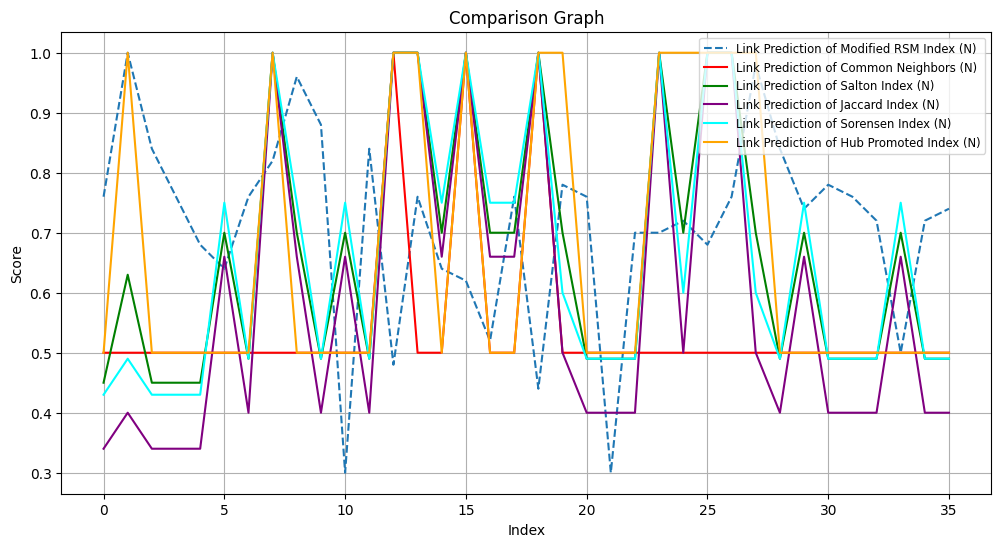

In [331]:
x = merged_df.index

# Vẽ các đường tương ứng với từng chỉ số
plt.figure(figsize=(12, 6))

plt.plot(x, merged_df["Score of Link Prediction(N)"], linestyle='--', label="Link Prediction of Modified RSM Index (N)")
plt.plot(x, merged_df["Common Neighbors"], linestyle='-', label="Link Prediction of Common Neighbors (N)", color='red')
plt.plot(x, merged_df["Salton Index"], linestyle='-', label="Link Prediction of Salton Index (N)", color='green')
plt.plot(x, merged_df["Jaccard Index"], linestyle='-', label="Link Prediction of Jaccard Index (N)", color='purple')
plt.plot(x, merged_df["Sorensen Index"], linestyle='-', label="Link Prediction of Sorensen Index (N)", color='cyan')
plt.plot(x, merged_df["Hub Promoted"], linestyle='-', label="Link Prediction of Hub Promoted Index (N)", color='orange')

# Định dạng biểu đồ
plt.title("Comparison Graph")
plt.xlabel("Index")
plt.ylabel("Score")
plt.legend(loc="upper right", fontsize="small")
plt.grid(True)

# Hiển thị biểu đồ
plt.show()